In [2]:
import pandas as pd

df = pd.read_csv('./data/cleaned/consumption_temp_w_features.csv')


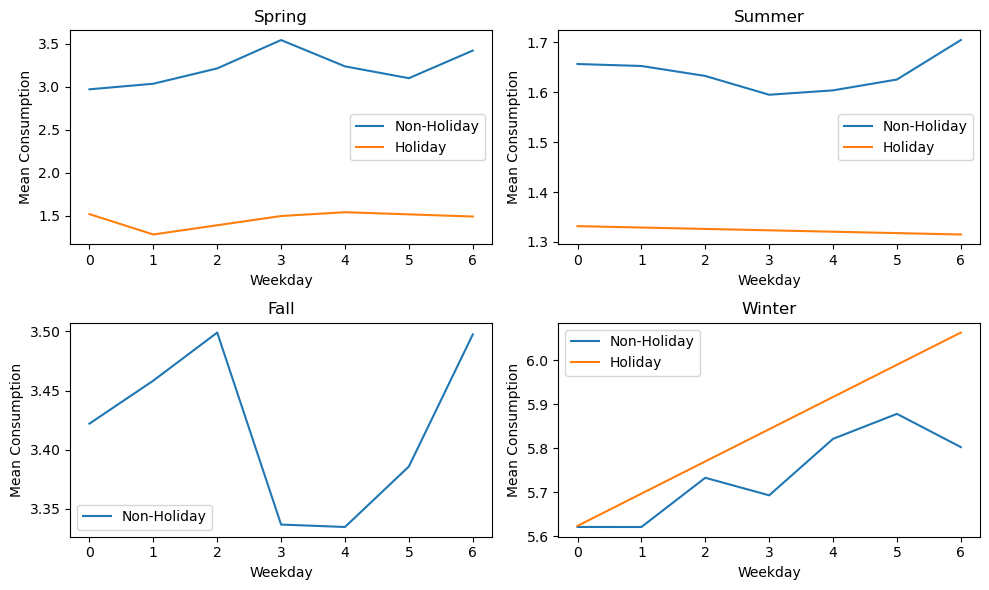

In [3]:
import matplotlib.pyplot as plt

# Your existing code for grouping the data
grouped_df = df.groupby(['season', 'weekday', 'is_holiday'])['consumption'].mean().reset_index()

# Define a dictionary for season names
season_names = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjust the size as needed
axs = axs.flatten()  # Flatten to a 1D array for easy indexing

for i, season in enumerate(season_names):
    # Filter data for the specific season
    season_df = grouped_df[grouped_df['season'] == season]

    # Plot data for the current season
    for (key,), grp in season_df.groupby(['is_holiday']):
        label = "Holiday" if key else "Non-Holiday"
        grp.plot(ax=axs[i], kind='line', x='weekday', y='consumption', label=label)

    axs[i].legend(loc='best')
    axs[i].set_title(season_names[season])
    axs[i].set_xlabel('Weekday')
    axs[i].set_ylabel('Mean Consumption')

plt.tight_layout()
plt.show()


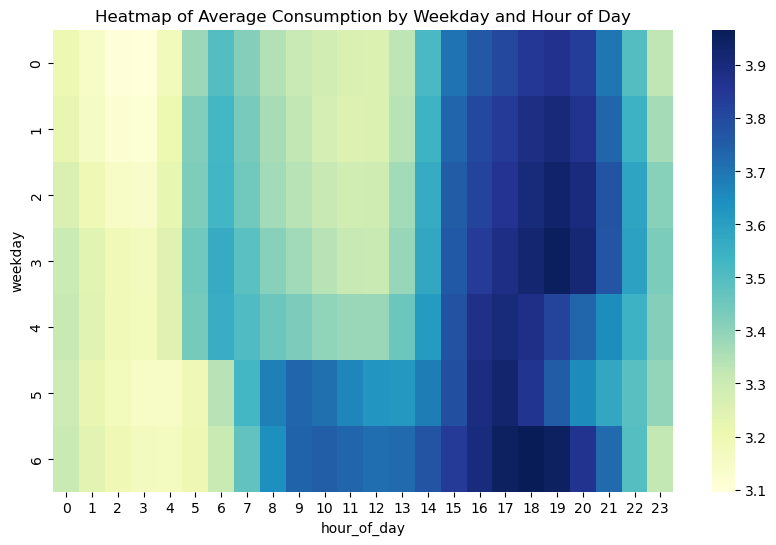

In [4]:
# Group data
grouped_df = df.groupby(['weekday', 'hour_of_day'])['consumption'].mean().reset_index()

# Pivot the data - 'weekday' as index, 'hour_of_day' as columns and 'consumption' as values
pivot_df = pd.pivot_table(grouped_df, values='consumption', index='weekday', columns='hour_of_day')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title('Heatmap of Average Consumption by Weekday and Hour of Day')
plt.show()

# The heatmap tells us that
# - consumption is generally low every night
# - consumption is generally lower on workdays, goes a bit up in the early 
#   morning, then goes down again around 7/8 am, when people presumably go to 
#   work/school. Consumption then goes up again in the evening, when people
#   presumably come home from work/school.
# - consumption is generally higher on weekends 



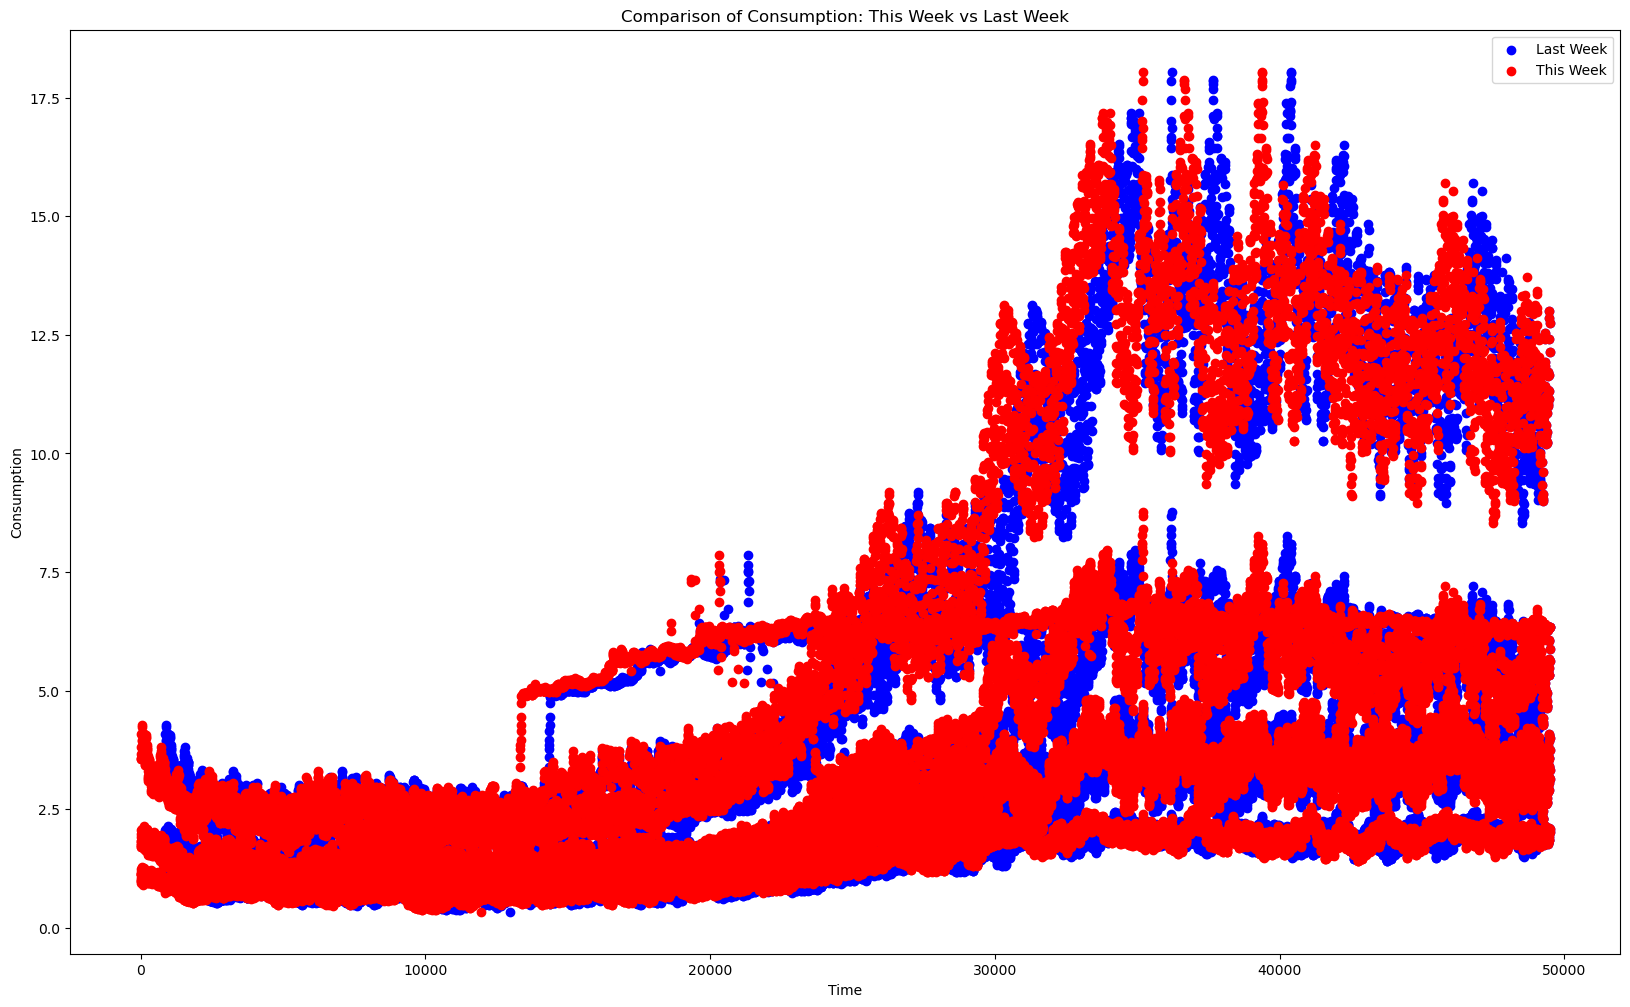

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

# scatter plot for last week's consumption
plt.scatter(df.index, df['consumption_lag_last_week'], color='blue', label='Last Week')

# scatter plot for this week's consumption
plt.scatter(df.index, df['consumption'], color='red', label='This Week')

plt.title('Comparison of Consumption: This Week vs Last Week')
plt.xlabel('Time')
plt.ylabel('Consumption')

plt.legend()

plt.show()

# From this we can almost see a mirror image where consumption for this week
# will be almost the same as the previous week.


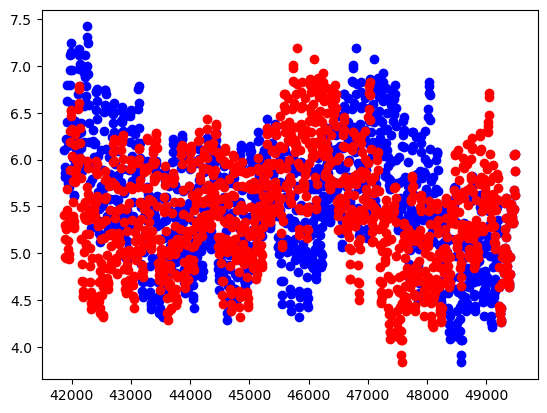

In [6]:
import pandas as pd

 # filter to only include the last few weeks of stavanger data
df_last_7_days = df[(df['date'] >= '2023-02-09') & (df['location'] == 'stavanger')]

plt.scatter(df_last_7_days.index, df_last_7_days['consumption_lag_last_week'], color='blue', label='Last Week')
plt.scatter(df_last_7_days.index, df_last_7_days['consumption'], color='red', label='This Week')


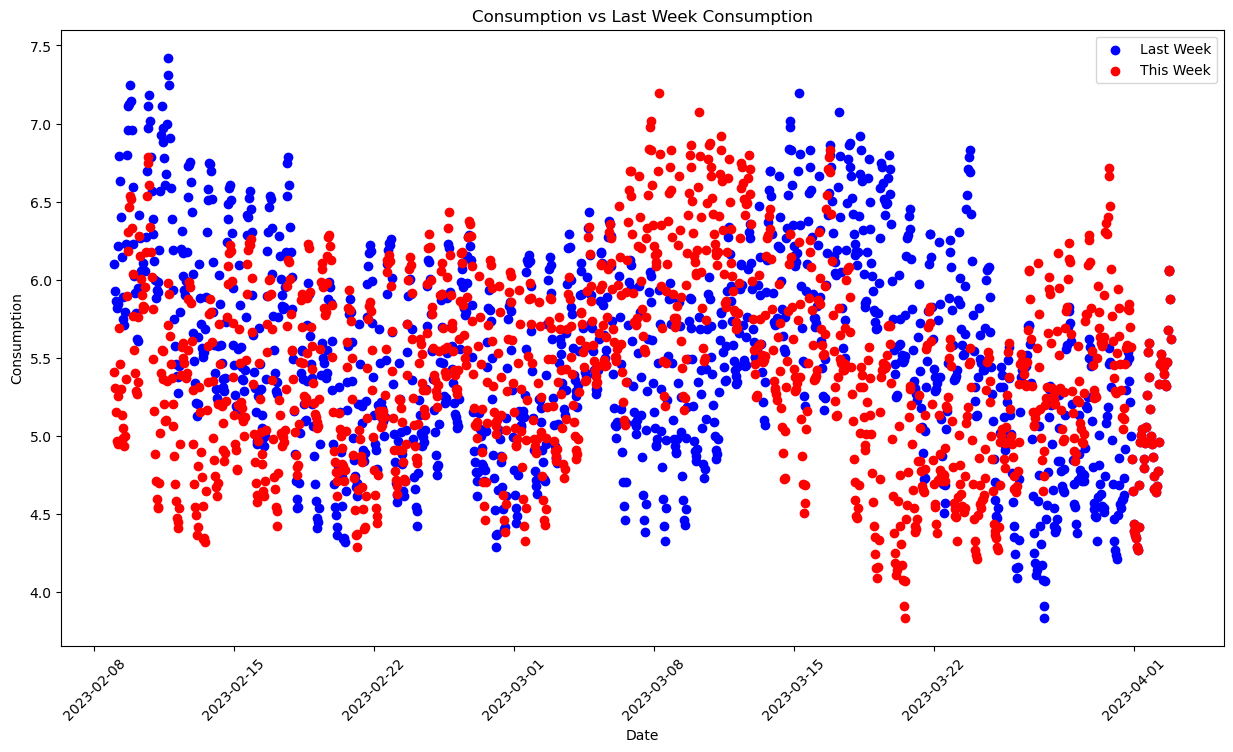

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['time'])

df.set_index('date', inplace=True)

 # filter to only include the last few weeks of stavanger data
df_last_7_days = df[(df.index >= '2023-02-09') & (df['location'] == 'stavanger')]

plt.figure(figsize=(15, 8))

plt.scatter(df_last_7_days.index, df_last_7_days['consumption_lag_last_week'], color='blue', label='Last Week')
plt.scatter(df_last_7_days.index, df_last_7_days['consumption'], color='red', label='This Week')

plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Consumption vs Last Week Consumption')

plt.legend()

plt.xticks(rotation=45)

plt.show()


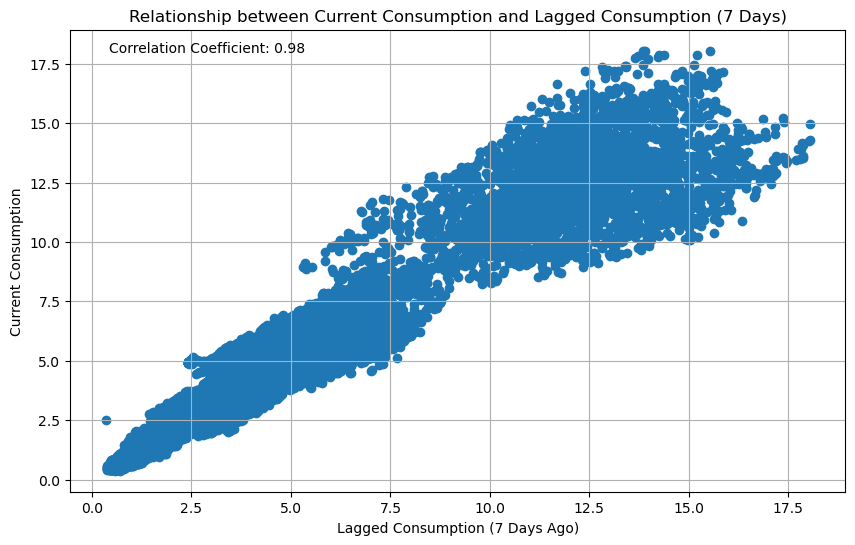

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it contains 'current_consumption' and 'lagged_consumption_7_days'

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['consumption_lag_last_week'], df['consumption'])
plt.title('Relationship between Current Consumption and Lagged Consumption (7 Days)')
plt.xlabel('Lagged Consumption (7 Days Ago)')
plt.ylabel('Current Consumption')
plt.grid(True)

# Show correlation coefficient
corr_coef = df['consumption'].corr(df['consumption_lag_last_week'])
plt.annotate(f'Correlation Coefficient: {corr_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

plt.show()


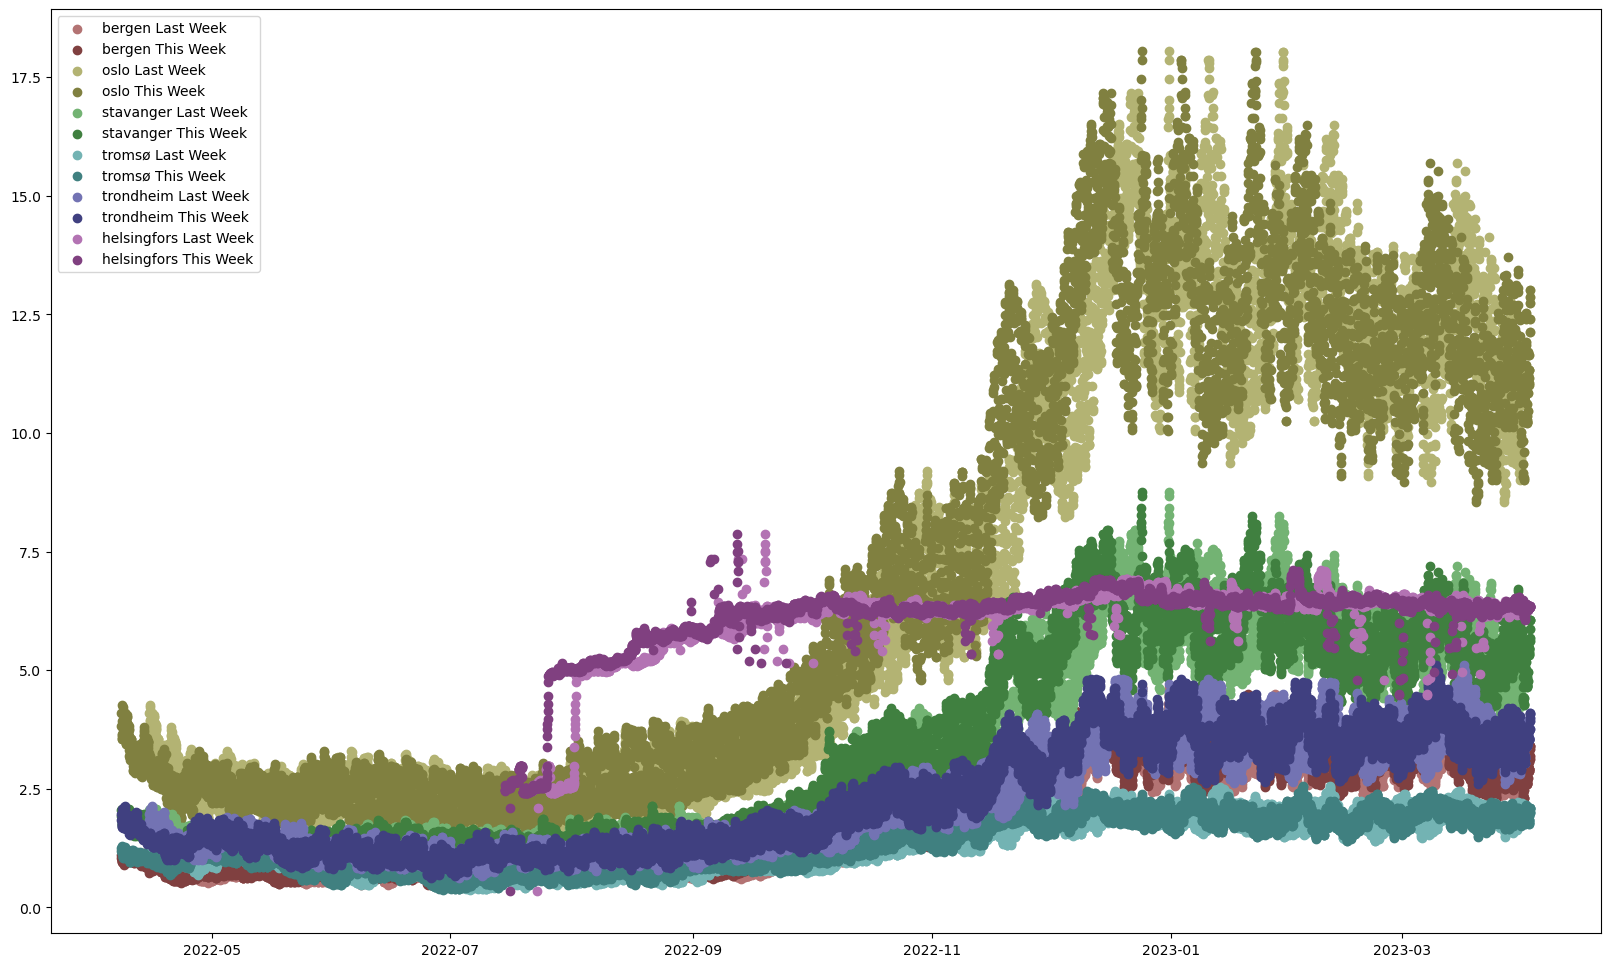

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys

locations = df['location'].unique()

# color palette with a different color for each location
colors = [colorsys.hsv_to_rgb(x*1.0/len(locations), 0.5, 0.5) for x in range(len(locations))]

plt.figure(figsize=(20, 12))

for i, location in enumerate(locations):
    # data for current location
    df_location = df[df['location'] == location]
    
    # plot consumption last week with lighter color
    plt.scatter(df_location.index, df_location['consumption_lag_last_week'], 
                color=[min(c + 0.2, 1) for c in colors[i]], label=f'{location} Last Week')
    
    # plot consumption with original color
    plt.scatter(df_location.index, df_location['consumption'], 
                color=colors[i], label=f'{location} This Week')

plt.legend()
plt.show()
